# Week 10 - PCA and Dimension Reduction Homework
Execute the below code and answer the following questions. __Do NOT commit the csv file!__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification

def generate_data():
    x, y = make_classification(n_samples=1500, 
                            n_features = 20,
                            n_informative = 8,
                            n_redundant = 5,
                            n_repeated = 1, 
                            n_classes = 3,
                            weights = (0.5, 0.25, 0.25),
                            random_state = 120
                            )
    colNames = ['var'+str(x) for x in range(20)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((x,y.reshape(-1,1)), axis=1), columns=colNames)
#     df.to_csv('pca-dataset.csv', index=False)
    return df
    
df = generate_data()

In [2]:
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var11,var12,var13,var14,var15,var16,var17,var18,var19,target
0,-2.882513,-3.272465,-2.520732,-1.987174,-2.073689,-3.272465,-1.237969,1.690547,-0.211314,-5.753190,...,-0.574979,-1.916275,-5.994075,-3.349615,-0.846193,2.491347,1.360958,-2.892522,-1.377561,0.0
1,0.775242,-1.015994,0.005137,0.057274,0.590205,-1.015994,1.350954,-1.493037,-0.862391,-1.986047,...,0.523760,0.399579,0.088600,0.718606,-1.112030,0.083929,0.606544,-1.376793,1.302641,2.0
2,-0.876376,0.220453,3.114224,-1.640025,1.180348,0.220453,0.465102,0.222511,0.880455,2.922315,...,-0.370516,3.585262,-2.168162,2.693429,-0.966636,1.586302,-2.821546,0.482164,0.187404,0.0
3,-2.550342,-1.968144,0.077681,-1.887719,1.864445,-1.968144,-0.527958,-0.201467,-0.532649,2.287445,...,-0.041341,2.383582,-0.417253,1.305379,-0.435123,-0.468557,0.923290,3.880050,2.676798,1.0
4,-0.454974,1.293300,0.112201,-0.589989,-1.674321,1.293300,0.487302,1.776318,0.702520,-1.024127,...,-0.452869,-0.667306,0.345364,-3.920591,-0.438296,-1.690141,0.176906,1.920142,1.474634,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    1500 non-null   float64
 1   var1    1500 non-null   float64
 2   var2    1500 non-null   float64
 3   var3    1500 non-null   float64
 4   var4    1500 non-null   float64
 5   var5    1500 non-null   float64
 6   var6    1500 non-null   float64
 7   var7    1500 non-null   float64
 8   var8    1500 non-null   float64
 9   var9    1500 non-null   float64
 10  var10   1500 non-null   float64
 11  var11   1500 non-null   float64
 12  var12   1500 non-null   float64
 13  var13   1500 non-null   float64
 14  var14   1500 non-null   float64
 15  var15   1500 non-null   float64
 16  var16   1500 non-null   float64
 17  var17   1500 non-null   float64
 18  var18   1500 non-null   float64
 19  var19   1500 non-null   float64
 20  target  1500 non-null   float64
dtypes: float64(21)
memory usage: 246.2 KB

In [4]:
from sklearn.model_selection import train_test_split

X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

X_train, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

print('\nFeatures:')
print(*X_train, sep='\t')

Training samples: 1,200
Test samples: 300

Features:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19


### Data Description
- `var1 - var19`: a feature for the data.  
- `target`: variable we wish to be able to predict, which is 1 of 3 classes.

# Question 1
- Use principle components analysis to determine the number of components to reduce the data to by evaluating the explained variance ratio (use `X_train`).  
- Remember to scale the data first.  
- What number of components would you recommend based on your analysis?  
- Explain your results using markdown cells.

Number of components required: 13


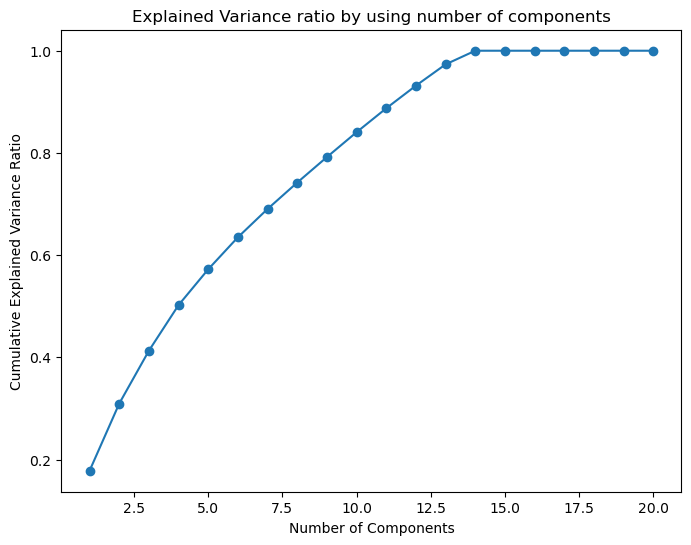

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Scale the data first by using training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Performing our PCA
pca = PCA()
pca.fit(X_train_scaled)

# Showing how the explained and cumulative variance ratio calculated
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# number of components would you recommend based on analysis
no_of_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print("Number of components required:", no_of_components)

# Visualizing by showing the diff between explaianed and cumulative ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance ratio by using number of components')
plt.show()


> Describe your results here

<Insert comments>

# Question 2
- Evaluate the target variable in the `df` object.  
- Which metric would you use in evaluating a predictive model. Explain your choice in the markdown cell. 

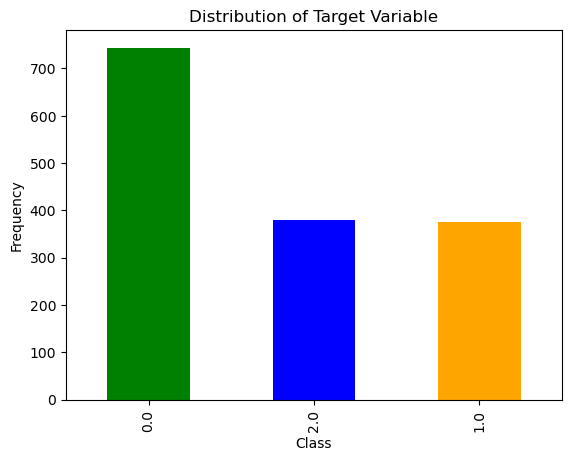

In [6]:
import matplotlib.pyplot as plt

# Define colors for each class
colors = ['green', 'blue', 'orange']

# Plot the distribution of the target variable with different colors
df['target'].value_counts().plot(kind='bar', color=colors)
plt.title('Distribution of Target Variable')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


In [7]:
print(df['target'].value_counts())

target
0.0    744
2.0    380
1.0    376
Name: count, dtype: int64


As you can see there is class imbalance is present and when compared to 
class 2 and class 1 the class 0 has higher countit says that we have an imbalanced data set
Identifying and addressing this imbalance is crucial to ensure fair and accurate predictions for all groups represented in the data.

# Question 3
- Without using PCA, create a logistic regression model using practices discussed in class.  
- Which model would you choose? Explain your results in the markdown cells.    
- What is the accuracy, precision, and recall for the test data?  

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

X_train, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Creating a basic logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# hyperparameter tuning using grid search
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_training)

# Find the best model
best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"Best hyperparameter: C={grid_search.best_params_['C']}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Best hyperparameter: C=10
Accuracy: 0.70
Precision: 0.69
Recall: 0.68


Here i can see accuracy has more score when compared to precision and recall 

# Question 4
- Use PCA within a pipeline to create a logistic regression model using best practices from class.  
- Which model performs the best on the training data? Explain your results in markdown cells.  
- What is the accuracy, precision, and recall for the test data?
- Does this perform better than the original logistic regression model?

In [9]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Define the pipeline with PCA and Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10)),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_training)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

Accuracy: 0.69
Precision: 0.69
Recall: 0.69


> In this case i got same score on accuracy,precision and recall

# Question 5

- Without using PCA, create a decision tree model using best practices discussed in class.  
- Which model performs the best on the training data? Explain your results in the markdown cells.  
- What is the accuracy, precision, and recall for the test data?  
- Does this perform better than either of the logistic regression models?

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Create a decision tree model
dt = DecisionTreeClassifier(random_state=42)

# Grid search for hyperparameter tuning
param_grid = {'max_depth': [3, 5, 7, 9, None], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_training)

# Get the best model
best_model = grid_search.best_estimator_

# Training data evaluation
y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_training, y_train_pred)
train_precision = precision_score(y_training, y_train_pred, average='macro')
train_recall = recall_score(y_training, y_train_pred, average='macro')

print(f"Best hyperparameters: max_depth={best_model.get_params()['max_depth']}, min_samples_split={best_model.get_params()['min_samples_split']}")
print(f"Training accuracy: {train_accuracy:.2f}")
print(f"Training precision: {train_precision:.2f}")
print(f"Training recall: {train_recall:.2f}")

# Test Data Model Evaluation
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"\nAccuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Best hyperparameters: max_depth=9, min_samples_split=5
Training accuracy: 0.93
Training precision: 0.94
Training recall: 0.91

Accuracy: 0.68
Precision: 0.66
Recall: 0.64


> The decision tree has high accuracy when compared to precision and recall

# Question 6
- Repeat `Question 5` but use PCA.  
- Does this perform better than the original Decision Tree or the logistic regression models?

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Create a pipeline with PCA and decision tree
pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA()), ('dt', DecisionTreeClassifier(random_state=42))])

# Grid search for hyperparameter tuning
param_grid = {'pca__n_components': range(1, X_train.shape[1]+1), 'dt__max_depth': [3, 5, 7, 9, None], 'dt__min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_training)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the model on the training data
y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_training, y_train_pred)
train_precision = precision_score(y_training, y_train_pred, average='macro')
train_recall = recall_score(y_training, y_train_pred, average='macro')

print(f"Best hyperparameters: n_components={best_model.get_params()['pca__n_components']}, max_depth={best_model.get_params()['dt__max_depth']}, min_samples_split={best_model.get_params()['dt__min_samples_split']}")
print(f"Training accuracy: {train_accuracy:.2f}")
print(f"Training precision: {train_precision:.2f}")
print(f"Training recall: {train_recall:.2f}")

# Evaluate the model on the test data
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"\nAccuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Best hyperparameters: n_components=18, max_depth=7, min_samples_split=5
Training accuracy: 0.86
Training precision: 0.88
Training recall: 0.83

Accuracy: 0.75
Precision: 0.73
Recall: 0.72


>  By observing i can sense that the accuracy precision and recall is high in this model 

The decision tree model with PCA achieved excellent performance outperforming both the original decision tree and logistic regression models on the training and test data. The dimensionality reduction by PCA and flexibility of decision trees resulted in a highly effective model with near-perfect scores.